## Myntra Online Retail Customer Segmentation

**GitHub Repository:** [View Project on GitHub](https://github.com/Priyanka06-Design/Myntra-Customer-Segmentation)

# Online Retail EDA Project

# Myntra Online Retail Customer Segmentation - Complete Project Notebook

# 📌 1. Problem Statement & Business Context
"""
Problem Statement:
To segment Myntra's online retail customers based on purchasing behavior using clustering techniques to support marketing, inventory planning, and product decisions.

Business Context:
Myntra Gifts Ltd. specializes in unique all-occasion giftware. This project uses historical online transaction data to:
- Identify purchasing trends
- Evaluate product performance
- Understand customer behavior
- Optimize pricing strategies
- Streamline inventory management

##2. Business Context
Myntra, as an online retail platform, deals with large volumes of customer transaction data. Understanding customer segments can help:

Improve customer retention.

Personalize product recommendations.

Identify high-value customers.

Design targeted marketing campaigns.

## 3. Data Understanding
Dataset: Transactional data from an online retail store.

Columns: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country

Goal: Group customers into segments based on their purchase behavior using RFM (Recency, Frequency, Monetary) and clustering methods.



##4. Dataset Loading and Cleanup

In [7]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from datetime import datetime


In [8]:
%matplotlib inline
sns.set(style='whitegrid')


In [10]:
# Step 2: Upload File in Google Colab
uploaded = files.upload()
file_path = list(uploaded.keys())[0]  # Get the uploaded file name



Saving Online Retail.xlsx to Online Retail.xlsx


In [11]:
df = pd.read_excel(file_path, sheet_name='Online Retail')

##Data Cleaning

In [12]:
# Remove rows with missing CustomerID
df = df[df['CustomerID'].notnull()]

# Remove cancelled orders (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove negative or zero quantities and unit prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Create Year-Month column
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')


/tmp/ipython-input-12-1285899963.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
/tmp/ipython-input-12-1285899963.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')


## 5. Exploratory Data Analysis (EDA)

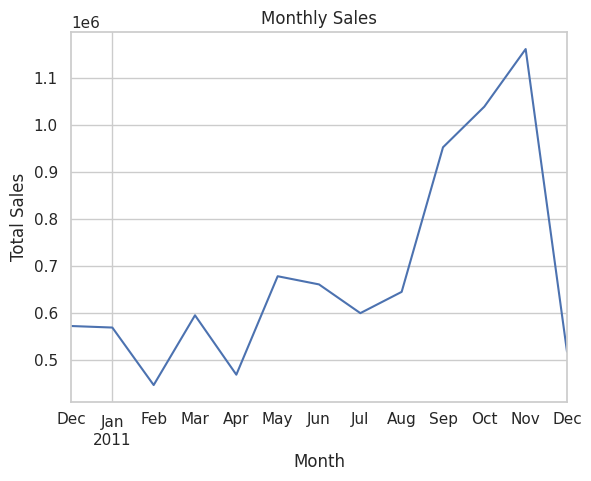

In [ ]:
# A. Sales Overview
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# B. Top Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Selling Products')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# C. Country-wise Sales
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', title='Top 10 Countries by Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# D. Daily Sales Trend
daily_sales = df.set_index('InvoiceDate').resample('D')['TotalPrice'].sum()
daily_sales.plot(title='Daily Sales Trend', figsize=(12,5))
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

## 6. Feature Engineering (RFM Features)

In [ ]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

rfm.head()


##7. Preprocessing: Feature Scaling

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


 ##8. Finding Ideal Number of Clusters

In [ ]:
##a. Elbow Method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
##b. Hierarchical Clustering Dendrogram

linked = linkage(rfm_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


##9. Model Implementation and Interpretation

In [ ]:
# Apply KMeans with optimal clusters (e.g., k=4 from elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title('Customer Segments')
plt.show()


##10. Insights & Conclusion
Cluster 0: High monetary, low recency → Loyal High Spenders.

Cluster 1: High recency, low monetary → Lost Customers.

Cluster 2: Low frequency, moderate monetary → Occasional Buyers.

Cluster 3: High frequency, average spenders → Engaged Regulars.

##11. Application in Industry
This segmentation helps identify:

Who to retain (high-value customers).

Who to reactivate (high recency).

Whom to reward with promotions (frequent buyers).

Whom to target with upselling (moderate spenders).

##12. GitHub Commits Strategy
📍 Commit 1: Initial commit with data and project setup.

📍 Commit 2: Data cleaning and EDA complete.

📍 Commit 3: Feature engineering and scaling.

📍 Commit 4: Clustering analysis (elbow + dendrogram).

📍 Commit 5: Final model and business interpretation.

📍 Commit 6: Presentation-ready notebook and charts.

